In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [637]:
data = pd.read_csv("Data set CSV.csv")

In [ ]:
## Initializing Genetic algorithm Parameters ##
population_size = 50
generation_count = 100
elitism_rate = 0.2
crossover_prob = 0.6
mutation_prob = 0.1
tournament_size = 5

In [639]:
class Gene:
    def __init__(self, x, y, Name):
        self.x = x
        self.y = y
        self.Name = Name
    def __repr__(self):
        return str(self.Name)

    def distance_function(self, city):
        distance = math.sqrt(((self.x-city.x)**2)+((self.y-city.y)**2))
        return distance
        

In [640]:
gene_list = data.values.tolist()
genes_list = [Gene(city[1], city[2], city[0]) for city in gene_list]

In [ ]:
## Generating distance matrix ##
def distance_matrix(genes_list):
    n = len(genes_list)
    distances = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            distances[i][j] = genes_list[i].distance_function(genes_list[j])
    return distances

In [642]:
print(distance_matrix(genes_list))

[[ 0.         28.87330006 82.1295263  45.79853229 68.35015748 52.07763037
  72.07872878 42.02118426 51.01660496 54.99985149 28.72962105 74.40947126
  22.71014783 72.00534444 45.46281016]
 [28.87330006  0.         54.77322542 45.6589604  42.02945447 43.21709674
  43.20558157 22.76963429 22.83126946 30.61841561 40.63515089 51.10681948
  10.39059841 51.90414603 20.33195751]
 [82.1295263  54.77322542  0.         68.27106574 45.67884154 54.76484963
  22.7582051  43.25551074 40.72127506 28.70629549 79.49407488 20.41259831
  64.53727736 30.80890945 51.03909543]
 [45.79853229 45.6589604  68.27106574  0.         82.2889109  14.40183791
  72.08048339 30.51648565 62.13119423 42.02542798 20.6351502  50.95841785
  51.16833511 42.91122513 64.53535684]
 [68.35015748 42.02945447 45.67884154 82.2889109   0.         74.25389315
  22.92069009 52.13033984 20.3585794  45.73414736 82.08402545 57.96169312
  45.64007918 65.54310368 22.8873515 ]
 [52.07763037 43.21709674 54.76484963 14.40183791 74.25389315  0.

In [643]:
type(genes_list)

list

In [644]:
class Chromosome:
    def __init__(self, genes_list, distance_matrix):
        self.genes_list = genes_list
        self.route = random.sample(genes_list, len(genes_list))
        self.distance_matrix = distance_matrix
        self.fitness_score = 1/self.calculate_distance()
        
    def calculate_distance(self):
        total_distance = 0
        route_list = self.route
        for i in range(len(route_list)-1):
            city1 = route_list[i]
            city2 = route_list[i+1]
            index1 = self.genes_list.index(city1)
            index2 = self.genes_list.index(city2)
            total_distance += self.distance_matrix[index1][index2]
        index_last = self.genes_list.index(route_list[-1])
        index_first = self.genes_list.index(route_list[0])
        total_distance += self.distance_matrix[index_last][index_first]
        return total_distance
    def mutate(self, mutation_prob):
        if np.random.rand() < mutation_prob:
            n = len(self.route)
            i,j = np.random.choice(n, 2, replace=False)
            self.route[i], self.route[j] = self.route[j], self.route[i]
            self.fitness_score = 1/self.calculate_distance()
            
    def crossover(self, other):
        n = len(self.route)
        child_route = [None]*n
        half_parent = n//2
        child_route[:half_parent] = self.route[:half_parent]
        child_route[half_parent:] = [gene for gene in other.route if gene not in child_route]

        return Chromosome(child_route, self.distance_matrix)
    

In [645]:
def initialize_population(population_size, genes_list, distance_matrix):
    population = []
    for i in range(population_size):
        random_route = np.random.permutation(genes_list).tolist()
        population.append(Chromosome(random_route, distance_matrix))
    return population

In [646]:
test_dist_matrix = distance_matrix(genes_list)
initial_pop = initialize_population(population_size, genes_list, test_dist_matrix)
for i, ch1 in enumerate (initial_pop):
    print(f"Chromosome {i+1}: {[gene.Name for gene in ch1.route]}")

Chromosome 1: [9.0, 7.0, 6.0, 11.0, 12.0, 2.0, 4.0, 14.0, 5.0, 3.0, 13.0, 10.0, 15.0, 8.0, 1.0]
Chromosome 2: [1.0, 5.0, 11.0, 2.0, 6.0, 3.0, 14.0, 15.0, 10.0, 8.0, 9.0, 12.0, 7.0, 13.0, 4.0]
Chromosome 3: [3.0, 7.0, 9.0, 10.0, 12.0, 14.0, 4.0, 1.0, 15.0, 5.0, 8.0, 13.0, 6.0, 11.0, 2.0]
Chromosome 4: [15.0, 1.0, 11.0, 4.0, 2.0, 8.0, 7.0, 5.0, 13.0, 9.0, 12.0, 14.0, 3.0, 10.0, 6.0]
Chromosome 5: [10.0, 8.0, 4.0, 11.0, 3.0, 9.0, 2.0, 7.0, 1.0, 12.0, 5.0, 6.0, 13.0, 15.0, 14.0]
Chromosome 6: [12.0, 13.0, 2.0, 14.0, 9.0, 4.0, 8.0, 7.0, 1.0, 15.0, 3.0, 10.0, 11.0, 5.0, 6.0]
Chromosome 7: [9.0, 2.0, 10.0, 3.0, 1.0, 13.0, 6.0, 5.0, 14.0, 12.0, 4.0, 7.0, 15.0, 8.0, 11.0]
Chromosome 8: [12.0, 11.0, 8.0, 9.0, 5.0, 10.0, 7.0, 2.0, 6.0, 3.0, 15.0, 14.0, 4.0, 13.0, 1.0]
Chromosome 9: [9.0, 3.0, 14.0, 10.0, 1.0, 13.0, 12.0, 11.0, 8.0, 15.0, 7.0, 6.0, 5.0, 2.0, 4.0]
Chromosome 10: [7.0, 6.0, 12.0, 3.0, 1.0, 10.0, 14.0, 15.0, 2.0, 5.0, 4.0, 9.0, 11.0, 13.0, 8.0]
Chromosome 11: [8.0, 15.0, 11.0, 2.0, 3

In [ ]:
## Insert initial population chromosomes into old generation list ##
old_generation = []
old_generation.extend(initial_pop)

In [648]:
def elitism (population, elitism_rate, population_size):
    sorted_population = sorted(population, key=lambda x: x.fitness_score, reverse=True)
    elite_count = int(elitism_rate * population_size)
    elite = sorted_population[:elite_count]
    return elite

In [649]:
def selection(population, k):
    tournament = np.random.choice(population, k, replace=False)
    tournament = sorted(tournament, key=lambda x: x.fitness_score, reverse=True)
    return tournament[0]

In [650]:
def parent_selection(population, k):
    parent1 = selection(population, k)
    parent2 = selection(population, k)
    while parent1 == parent2:
        parent2 = selection(population, k)
    return parent1, parent2

In [651]:
def genetic_algorithm(genes_list, population_size,generation_count,elitism_rate, k_tournament, mutation_prob):
    testing_dist_matrix = distance_matrix(genes_list)
    population = initialize_population(population_size, genes_list, testing_dist_matrix)
    for i in range(1, generation_count+1):
        new_population = elitism(population, elitism_rate, population_size)
        while len(new_population) < population_size:
            parent1, parent2 = parent_selection(population, k_tournament)
            if np.random.rand() < crossover_prob:
                child = parent1.crossover(parent2)
            else:
                child = Chromosome(np.random.permutation(genes_list).tolist(), testing_dist_matrix)
            if child not in new_population:
                child.mutate(mutation_prob)
                new_population.append(child)
        population = new_population
    best_route = min(population, key=lambda x: x.calculate_distance())
    return best_route

In [652]:
def cost_function(chromosome):
    return chromosome.calculate_distance()

In [ ]:
## Testing the genetic algorithm ##
best_route = genetic_algorithm(genes_list, population_size, generation_count, elitism_rate, tournament_size, mutation_prob)
best_route.route.append(best_route.route[0])
cost = cost_function(best_route)
print(f"Generation {generation_count}: Best route = {[genes_list[gene] if isinstance(gene, int) else gene.Name for gene in best_route.route]}, Cost = {cost}")

Generation 100: Best route = [8.0, 2.0, 14.0, 5.0, 7.0, 3.0, 15.0, 1.0, 9.0, 12.0, 13.0, 11.0, 4.0, 10.0, 6.0, 8.0], Cost = 472.0603373655989


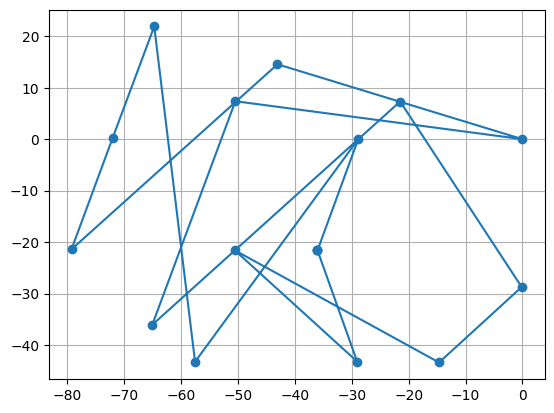

In [654]:
def plot_route(chromosome):
    x_coords = [gene.x for gene in chromosome.route]
    y_coords = [gene.y for gene in chromosome.route]
    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])
    plt.plot(x_coords, y_coords, marker='o')
    plt.grid(True)
    plt.show()
plot_route(best_route)